# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu


In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
affine                        2.4.0
aiosignal                     1.3.1
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea

tensorflow                    2.11.0
tensorflow-estimator          2.11.0
tensorflow-io-gcs-filesystem  0.31.0
tensorrt                      8.5.3.1
termcolor                     2.2.0
terminado                     0.13.1
testpath                      0.6.0
text-unidecode                1.3
textdistance                  4.2.1
threadpoolctl                 3.1.0
three-merge                   0.1.1
thundersvm                    0.3.3
tifffile                      2021.7.2
tinycss                       0.4
tldextract                    3.2.0
toml                          0.10.2
tomli                         2.0.1
tomlkit                       0.11.1
toolz                         0.11.2
tornado                       6.1
tqdm                          4.64.1
traitlets                     5.1.1
tune-sklearn                  0.4.6
Twisted                       22.2.0
typing_extensions             4.3.0
ujson                         5.4.0
Unidecode                     1.2.0
urllib3             

In [3]:
import tensorflow as tf
import os

2023-09-15 06:17:24.245283: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel//impi/5.0.2.044/intel64/lib:/opt/intel/mic/coi/host-linux-release/lib:/opt/intel/mic/myo/lib:/opt/intel/composer_xe_2015.1.133/compiler/lib/intel64:/opt/intel/composer_xe_2015.1.133/mkl/lib/intel64:/opt/intel/composer_xe_2015.1.133/compiler/lib/intel64:/opt/intel/mic/coi/host-linux-release/lib:/opt/intel/mic/myo/lib:/opt/intel/composer_xe_2015.1.133/mpirt/lib/intel64:/opt/intel/composer_xe_2015.1.133/ipp/../compiler/lib/intel64:/opt/intel/composer_xe_2015.1.133/ipp/lib/intel64:/opt/intel/mic/coi/host-linux-release/lib:/opt/intel/mic/myo/lib:/opt/intel/composer_xe_2015.1.133/compiler/lib/intel64:/opt/intel/composer_xe_2015.1.133/mkl/lib/intel64:/opt/intel/composer_xe_2015.1.133/tbb/lib/intel64/gcc4.4
2023-09-15 06:17:24

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-09-15 06:18:29.201463: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel//impi/5.0.2.044/intel64/lib:/opt/intel/mic/coi/host-linux-release/lib:/opt/intel/mic/myo/lib:/opt/intel/composer_xe_2015.1.133/compiler/lib/intel64:/opt/intel/composer_xe_2015.1.133/mkl/lib/intel64:/opt/intel/composer_xe_2015.1.133/compiler/lib/intel64:/opt/intel/mic/coi/host-linux-release/lib:/opt/intel/mic/myo/lib:/opt/intel/composer_xe_2015.1.133/mpirt/lib/intel64:/opt/intel/composer_xe_2015.1.133/ipp/../compiler/lib/intel64:/opt/intel/composer_xe_2015.1.133/ipp/lib/intel64:/opt/intel/mic/coi/host-linux-release/lib:/opt/intel/mic/myo/lib:/opt/intel/composer_xe_2015.1.133/compiler/lib/intel64:/opt/intel/composer_xe_2015.1.133/mkl/lib/intel64:/opt/intel/composer_xe_2015.1.133/tbb/lib/intel64/gcc4.4
2023-09-15 06:18:29.245770: W

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'minerals' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

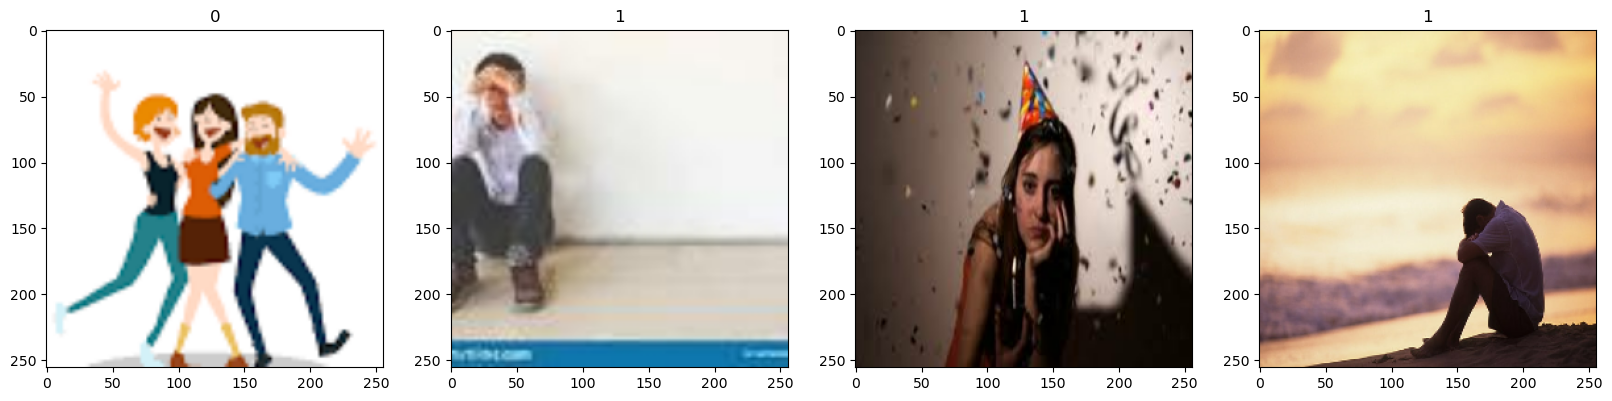

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [16]:
data.as_numpy_iterator().next()

(array([[[[0.92549783, 0.8431449 , 0.7215763 ],
          [0.92225796, 0.84774816, 0.7301011 ],
          [0.92293966, 0.84842986, 0.7307828 ],
          ...,
          [0.9834906 , 0.8910886 , 0.7412112 ],
          [0.9836397 , 0.8895221 , 0.7405025 ],
          [0.982958  , 0.8888404 , 0.7398208 ]],
 
         [[0.93929994, 0.856947  , 0.7353784 ],
          [0.9353784 , 0.8608686 , 0.7353784 ],
          [0.9432215 , 0.8687117 , 0.75106466],
          ...,
          [0.9942019 , 0.9079274 , 0.7549862 ],
          [0.99812347, 0.9040058 , 0.7549862 ],
          [0.99578524, 0.9016676 , 0.752648  ]],
 
         [[0.94168967, 0.8593367 , 0.73776805],
          [0.9377681 , 0.86325824, 0.73776805],
          [0.93879443, 0.86428463, 0.7466376 ],
          ...,
          [0.9994868 , 0.9132123 , 0.752428  ],
          [0.9994868 , 0.9132123 , 0.752428  ],
          [0.99607843, 0.9098039 , 0.7490196 ]],
 
         ...,
 
         [[0.17256841, 0.1456306 , 0.08268636],
          [0.18380

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 977ms/step - loss: 0.8121 - accuracy: 0.5179 - val_loss: 0.6561 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 8s 959ms/step - loss: 0.6773 - accuracy: 0.5938 - val_loss: 0.6484 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 8s 959ms/step - loss: 0.6203 - accuracy: 0.7143 - val_loss: 0.5253 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 8s 945ms/step - loss: 0.4565 - accuracy: 0.8036 - val_loss: 0.5428 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 9s 992ms/step - loss: 0.4530 - accuracy: 0.7634 - val_loss: 0.3733 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 8s 901ms/step - loss: 0.4148 - accuracy: 0.8259 - val_loss: 0.5407 - val_accuracy: 0.7812
Epoch 7/20
7/7 [==============================] - 8s 976ms/step - loss: 0.3849 - accuracy: 0.8705 - val_loss: 0.3201 - val_accuracy: 0.9062
Epoch 8/20
7/7 [===

# 8. Plot Performance

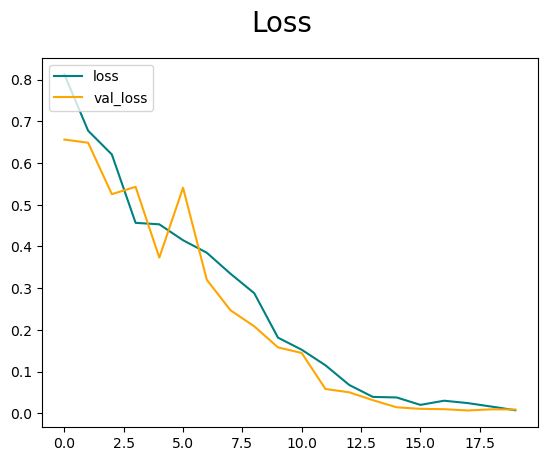

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

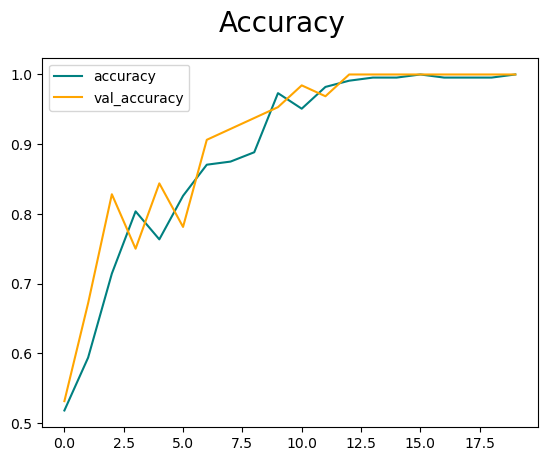

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 353ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8888889, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


# 10. Test

In [35]:
import cv2

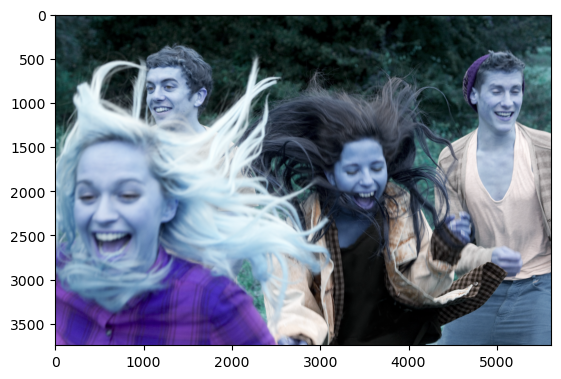

In [36]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

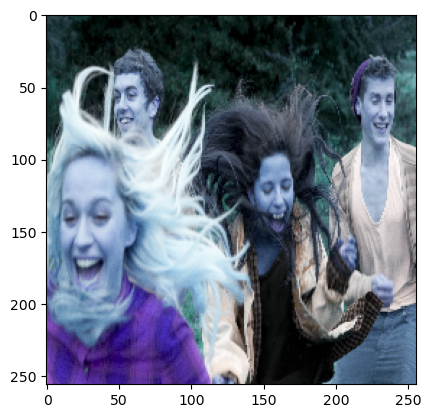

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 39ms/step


In [39]:
yhat

array([[0.17021863]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('imageclassifier.h5'))

In [43]:
new_model = load_model('imageclassifier.h5')

In [44]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 136ms/step


array([[0.17021863]], dtype=float32)